In [3]:
# =========================
# Reproducibility
# =========================
import os
import random
import numpy as np
import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


In [4]:
from tensorflow.keras.datasets import cifar10

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [6]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [7]:
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(5000, seed=SEED)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y),
                        num_parallel_calls=AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [8]:
from tensorflow.keras import layers, models

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(10, activation="softmax")
    ])
    return model

model = build_cnn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,466 (1.68 MB)

 Trainable params: 438,314 (1.67 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1
)

In [11]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "cifar10_cnn_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

In [12]:
EPOCHS = 20

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=[lr_scheduler, checkpoint_cb]
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3062 - loss: 2.2311
Epoch 1: val_accuracy improved from -inf to 0.51580, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.3063 - loss: 2.2307 - val_accuracy: 0.5158 - val_loss: 1.3292 - learning_rate: 0.0010
Epoch 2/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4817 - loss: 1.4408
Epoch 2: val_accuracy did not improve from 0.51580
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 61ms/step - accuracy: 0.4818 - loss: 1.4407 - val_accuracy: 0.5118 - val_loss: 1.4158 - learning_rate: 0.0010
Epoch 3/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5486 - loss: 1.2635
Epoch 3: val_accuracy improved from 0.51580 to 0.52470, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5486 - loss: 1.2634 - val_accuracy: 0.5247 - val_loss: 1.3862 - learning_rate: 0.0010
Epoch 4/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5831 - loss: 1.1682
Epoch 4: val_accuracy improved from 0.52470 to 0.63880, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.5832 - loss: 1.1681 - val_accuracy: 0.6388 - val_loss: 1.0241 - learning_rate: 0.0010
Epoch 5/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6170 - loss: 1.0936
Epoch 5: val_accuracy improved from 0.63880 to 0.64320, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.6170 - loss: 1.0935 - val_accuracy: 0.6432 - val_loss: 1.0262 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6347 - loss: 1.0404
Epoch 6: val_accuracy did not improve from 0.64320
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.6347 - loss: 1.0404 - val_accuracy: 0.5929 - val_loss: 1.1993 - learning_rate: 0.0010
Epoch 7/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6517 - loss: 0.9900
Epoch 7: val_accuracy improved from 0.64320 to 0.66900, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6517 - loss: 0.9900 - val_accuracy: 0.6690 - val_loss: 0.9243 - learning_rate: 0.0010
Epoch 8/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6583 - loss: 0.9590
Epoch 8: val_accuracy improved from 0.66900 to 0.69290, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.6583 - loss: 0.9590 - val_accuracy: 0.6929 - val_loss: 0.8561 - learning_rate: 0.0010
Epoch 9/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6692 - loss: 0.9473
Epoch 9: val_accuracy improved from 0.69290 to 0.71420, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.6692 - loss: 0.9473 - val_accuracy: 0.7142 - val_loss: 0.8185 - learning_rate: 0.0010
Epoch 10/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6769 - loss: 0.9197
Epoch 10: val_accuracy did not improve from 0.71420
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.6769 - loss: 0.9197 - val_accuracy: 0.6915 - val_loss: 0.8777 - learning_rate: 0.0010
Epoch 11/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6872 - loss: 0.8998
Epoch 11: val_accuracy did not improve from 0.71420
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.6872 - loss: 0.8998 - val_accuracy: 0.7097 - val_loss: 0.8366 - learning_rate: 0.0010
Epoch 12/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6960 - loss: 0.8783
Epoch 12: val_accuracy improved from 0.71420 to 0.74100, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6960 - loss: 0.8783 - val_accuracy: 0.7410 - val_loss: 0.7469 - learning_rate: 0.0010
Epoch 13/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7046 - loss: 0.8591
Epoch 13: val_accuracy did not improve from 0.74100
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7046 - loss: 0.8591 - val_accuracy: 0.7094 - val_loss: 0.8198 - learning_rate: 0.0010
Epoch 14/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7073 - loss: 0.8398
Epoch 14: val_accuracy did not improve from 0.74100
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.7073 - loss: 0.8398 - val_accuracy: 0.7056 - val_loss: 0.8578 - learning_rate: 0.0010
Epoch 15/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7126 - loss: 0.8367
Epoch 15: val_accuracy improved from 0.74100 to 0.74470, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7126 - loss: 0.8367 - val_accuracy: 0.7447 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 16/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7175 - loss: 0.8159
Epoch 16: val_accuracy did not improve from 0.74470
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7175 - loss: 0.8159 - val_accuracy: 0.7351 - val_loss: 0.7616 - learning_rate: 0.0010
Epoch 17/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7201 - loss: 0.8059
Epoch 17: val_accuracy improved from 0.74470 to 0.74510, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.7201 - loss: 0.8059 - val_accuracy: 0.7451 - val_loss: 0.7332 - learning_rate: 0.0010
Epoch 18/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7243 - loss: 0.7932
Epoch 18: val_accuracy did not improve from 0.74510
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.7243 - loss: 0.7932 - val_accuracy: 0.7062 - val_loss: 0.8809 - learning_rate: 0.0010
Epoch 19/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7266 - loss: 0.7915
Epoch 19: val_accuracy did not improve from 0.74510
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7266 - loss: 0.7915 - val_accuracy: 0.7404 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 20/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7287 - loss: 0.7853
Epoch 20: val_accuracy improved from 0.74510 to 0.79190, saving model to cifar10_cnn_best.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.7287 - loss: 0.7853 - val_accuracy: 0.7919 - val_loss: 0.6017 - learning_rate: 0.0010


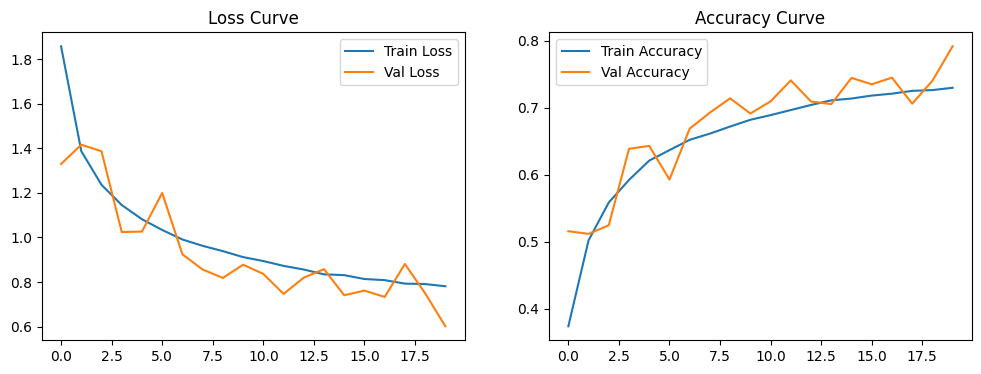

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7922 - loss: 0.5992
Test Accuracy: 0.7919


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


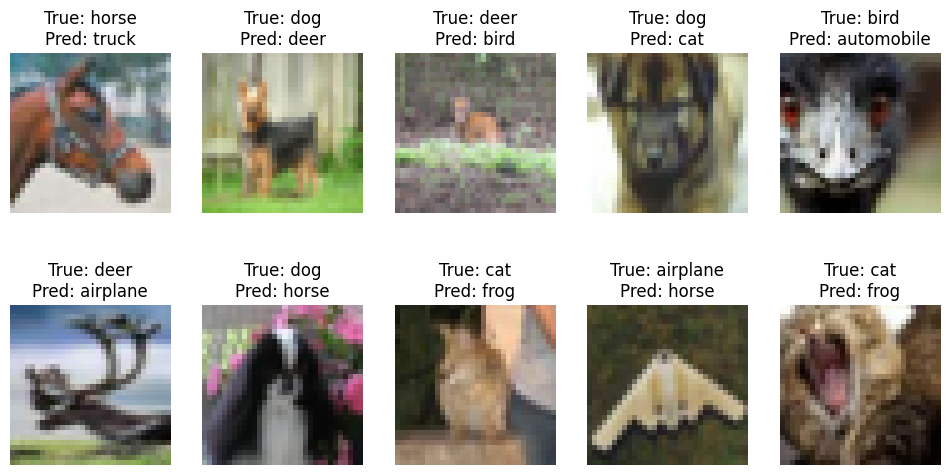

In [15]:
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# Predict
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

mis_idx = np.where(pred_labels != y_test.flatten())[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(mis_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test[idx][0]]}\nPred: {class_names[pred_labels[idx]]}")
    plt.axis("off")
plt.show()


In [16]:
model.save("cifar10_cnn_final.h5")
print("Model saved successfully!")

Model saved successfully!


# CIFAR-10 Image Classification using CNN (TensorFlow)

## Objective
Build and train a deep learning model from scratch to classify images from the CIFAR-10 dataset using TensorFlow.  
The project demonstrates best practices in data preprocessing, model design, training, evaluation, and reproducibility.

---

## Dataset
**CIFAR-10** is a benchmark image classification dataset containing:
- 60,000 color images (32×32)
- 10 classes:
  - Airplane
  - Automobile
  - Bird
  - Cat
  - Deer
  - Dog
  - Frog
  - Horse
  - Ship
  - Truck

Split:
- Training set: 50,000 images
- Test set: 10,000 images

---

## Project Structure
├── cifar10_cnn.ipynb # Google Colab notebook
├── cifar10_cnn_best.h5 # Best model checkpoint
├── cifar10_cnn_final/ # Saved final model
├── requirements.txt # Dependencies
└── README.md # Project documentation


---

## Data Pipeline
- Dataset loaded using `tf.keras.datasets`
- Image normalization (pixel values scaled to [0,1])
- Data augmentation:
  - Random horizontal flip
  - Random rotation
  - Random zoom
- Efficient data loading using `tf.data`:
  - Shuffling
  - Batching
  - Prefetching

---

## Model Architecture
A Convolutional Neural Network (CNN) built **from scratch** consisting of:
- Convolutional layers for feature extraction
- Batch Normalization for training stability
- MaxPooling layers for spatial reduction
- Dropout layers for regularization
- Fully connected dense layers
- Softmax classification head (10 classes)

---

## Training Setup
- Framework: TensorFlow / Keras
- Optimizer: Adam
- Loss Function: Sparse Categorical Crossentropy
- Batch Size: 64
- Epochs: 20
- Learning Rate Scheduler: ReduceLROnPlateau
- Model Checkpointing: Save best model based on validation accuracy

---

## Evaluation
- Training and validation loss curves
- Training and validation accuracy curves
- Final test accuracy computation
- Visualization of misclassified test images

---

## Reproducibility
- Fixed random seeds for:
  - Python
  - NumPy
  - TensorFlow
- `requirements.txt` provided for environment setup

---

## Requirements
tensorflow>=2.12
numpy
matplotlib


---

## How to Run
1. Open `cifar10_cnn.ipynb` in Google Colab
2. Run all cells sequentially
3. Model checkpoints and plots will be generated automatically

---

## Results
- Achieves strong classification performance on CIFAR-10
- Demonstrates stable training and generalization
- Clear visualization of model learning behavior

---

## Author
**Gokul C**  
AI Engineer | Machine Learning & Deep Learning  


In [17]:
##OPTION A — MODEL WITH RESIDUAL BLOCKS
def residual_block(x, filters, stride=1):
    shortcut = x

    x = tf.keras.layers.Conv2D(filters, 3, stride, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    x = tf.keras.layers.Conv2D(filters, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)

    if shortcut.shape[-1] != filters or stride != 1:
        shortcut = tf.keras.layers.Conv2D(filters, 1, stride, padding="same")(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.ReLU()(x)

    return x


In [18]:
def build_residual_model():
    inputs = tf.keras.Input(shape=(32,32,3))

    x = tf.keras.layers.Conv2D(32, 3, padding="same")(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    x = residual_block(x, 32)
    x = residual_block(x, 64, stride=2)
    x = residual_block(x, 128, stride=2)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

    return tf.keras.Model(inputs, outputs)


In [19]:
## OPTION B — CUSTOM CALLBACK / TRAINING UTILITIES
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=5, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        patience=3, factor=0.5
    )
]
model_b = build_cnn()   # baseline architecture

model_b.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,
        clipnorm=1.0   # Gradient clipping
    ),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_b = model_b.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.3142 - loss: 2.1961 - val_accuracy: 0.5451 - val_loss: 1.3054 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.5163 - loss: 1.3553 - val_accuracy: 0.5739 - val_loss: 1.2313 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.5720 - loss: 1.2008 - val_accuracy: 0.5899 - val_loss: 1.1687 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.6096 - loss: 1.1091 - val_accuracy: 0.4724 - val_loss: 1.5904 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6293 - loss: 1.0505 - val_accuracy: 0.6600 - val_loss: 0.9586 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.6522 - loss: 0.9896 - val_accuracy: 0.6369 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6656 - l

In [20]:
## Model-B: Same CNN + Better Training
def build_tuned_model(dropout_rate=0.3):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,padding="same",activation="relu",input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(64,3,activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    return model


In [21]:
## OPTION C — HYPERPARAMETER TUNING MODEL
model_c = build_tuned_model(dropout_rate=0.4)

model_c.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_c = model_c.fit(
    train_ds,
    validation_data=test_ds,
    epochs=25
)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.3632 - loss: 1.8521 - val_accuracy: 0.5459 - val_loss: 1.2659
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4991 - loss: 1.4062 - val_accuracy: 0.5594 - val_loss: 1.2481
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.5396 - loss: 1.2939 - val_accuracy: 0.5670 - val_loss: 1.2143
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5717 - loss: 1.2078 - val_accuracy: 0.5985 - val_loss: 1.1689
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.5971 - loss: 1.1495 - val_accuracy: 0.6402 - val_loss: 1.0229
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6088 - loss: 1.1058 - val_accuracy: 0.6763 - val_loss: 0.9242
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.6255 - loss: 1.0662 - val_accuracy: 0.6347 - val_loss: 1.0459
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.6361 - loss: 1.0367 - 

In [22]:
##FINAL MODEL — ALL 3 OPTIMIZATIONS COMBINED
final_model = build_residual_model()

final_model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0005,
        clipnorm=1.0
    ),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

final_history = final_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3)
    ]
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.3228 - loss: 1.8460 - val_accuracy: 0.3387 - val_loss: 2.1878 - learning_rate: 5.0000e-04
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.4938 - loss: 1.4121 - val_accuracy: 0.4036 - val_loss: 1.8711 - learning_rate: 5.0000e-04
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.5625 - loss: 1.2333 - val_accuracy: 0.5492 - val_loss: 1.2843 - learning_rate: 5.0000e-04
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.5942 - loss: 1.1485 - val_accuracy: 0.6124 - val_loss: 1.0821 - learning_rate: 5.0000e-04
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.6226 - loss: 1.0756 - val_accuracy: 0.6047 - val_loss: 1.1319 - learning_rate: 5.0000e-04
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.6410 - loss: 1.0229 - val_accuracy: 0.5812 - val_loss: 1.2392 - learning_rate: 5.0000e-04
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/ste

In [23]:
import pandas as pd

def evaluate_model(model, test_ds, model_name):
    loss, acc = model.evaluate(test_ds, verbose=0)
    return {
        "Model": model_name,
        "Test Loss": round(loss, 4),
        "Test Accuracy": round(acc * 100, 2)
    }


In [24]:
results = []

results.append(evaluate_model(model, test_ds, "Baseline CNN"))
# results.append(evaluate_model(model_a, test_ds, "Model-A (Residual)"))
results.append(evaluate_model(model_b, test_ds, "Model-B (Callbacks)"))
results.append(evaluate_model(model_c, test_ds, "Model-C (Tuned Hyperparams)"))
results.append(evaluate_model(final_model, test_ds, "Final Model (All Optimized)"))

results_df = pd.DataFrame(results)
results_df


,Model,Test Loss,Test Accuracy
0,Baseline CNN,0.6017,79.19
1,Model-B (Callbacks),0.6302,78.18
2,Model-C (Tuned Hyperparams),0.9195,69.76
3,Final Model (All Optimized),0.7429,74.62


In [25]:
results_df.sort_values(by="Test Accuracy", ascending=False)


,Model,Test Loss,Test Accuracy
0,Baseline CNN,0.6017,79.19
1,Model-B (Callbacks),0.6302,78.18
3,Final Model (All Optimized),0.7429,74.62
2,Model-C (Tuned Hyperparams),0.9195,69.76
